Implementar una aplicación en Python en Google Colab para segmentar a los clientes usando K-means clustering. Este código incluye la carga de datos, limpieza básica, preparación de los datos, aplicación del algoritmo K-means y visualización de los resultados.

paso 1: importar bibliotecas


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


paso 2:cargar el dataset

In [2]:
# archivo de datos en formato CSV
from google.colab import files
uploaded = files.upload()
# Cargar el dataset
df = pd.read_csv('dataset.csv')


Saving dataset.csv to dataset (1).csv


paso 3: EDA y limpieza de datos:

In [3]:
# Exploración inicial
print(df.head())
print(df.info())
print(df.describe())

# Check de valores nulos
print(df.isnull().sum())

# Check de duplicados
print(df.duplicated().sum())

# Check de tipos de datos
print(df.dtypes)

# Manejo de valores faltantes (si existen)
df = df.dropna()

# Codificación de variables categóricas
label_encoder = LabelEncoder()

categorical_columns = ['client_id', 'brand_id', 'country_code', 'partner_id', 'platform_id', 'media_id', 'category_name', 'video_type']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Escalado de variables numéricas
scaler = StandardScaler()
numerical_columns = ['seconds_elapsed', 'sessions']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


  client_id   client_name brand_id    brand_name country_code country_name  \
0        tg  Toon Goggles       tg  Toon Goggles           IN        India   
1        tg  Toon Goggles       tg  Toon Goggles           BD   Bangladesh   
2        tg  Toon Goggles       tg  Toon Goggles           BD   Bangladesh   
3        tg  Toon Goggles       tg  Toon Goggles           IN        India   
4        tg  Toon Goggles       tg  Toon Goggles           IN        India   

  partner_id     partner_name platform_id platform_name  media_id  \
0        tcl              TCL       html5         HTML5    120531   
1    android  General Android   androidtv    Android TV    280657   
2     vision          Unknown       html5         HTML5    280710   
3        jio          Jio STB       html5         HTML5    280643   
4   skyworth         Skyworth       html5         HTML5    280643   

                                  media_name category_name video_type  \
0  Behind the Scenes of Disney XD's Lab Rat

<ipython-input-3-52202e7a20a0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-3-52202e7a20a0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-3-52202e7a20a0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Check de calidad de datos adicionales

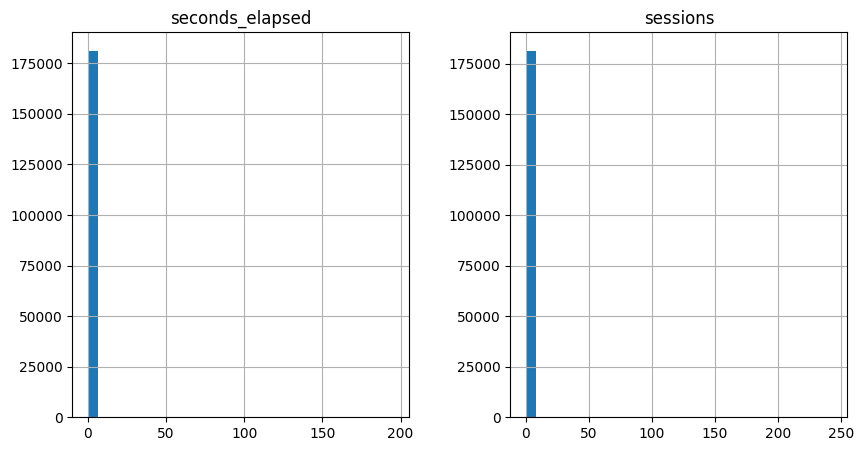

client_id: 1 categorías únicas
brand_id: 4 categorías únicas
country_code: 204 categorías únicas
partner_id: 110 categorías únicas
platform_id: 7 categorías únicas
media_id: 6227 categorías únicas
category_name: 49 categorías únicas
video_type: 7 categorías únicas


In [4]:
# Distribución de los datos
df[numerical_columns].hist(bins=30, figsize=(10, 5))
plt.show()

# Cardinalidad de las variables categóricas
for col in categorical_columns:
    print(f'{col}: {df[col].nunique()} categorías únicas')


paso4: preparacion de datos

In [5]:
# Seleccionar las características para el clustering
features = df[['seconds_elapsed', 'sessions', 'client_id', 'brand_id', 'country_code', 'partner_id', 'platform_id', 'media_id', 'category_name', 'video_type']]



paso 5: aplicar k-means clustering:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

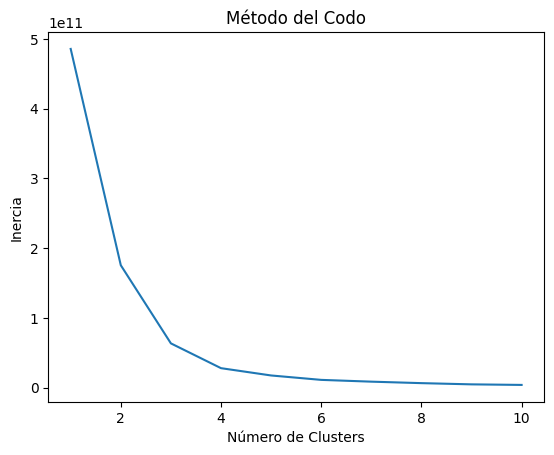

In [6]:
# Determinar el número óptimo de clusters usando el método del codo
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()
plt.show()


el método del codo es una técnica utilizada para determinar el número óptimo de clusters (grupos) en un algoritmo de clustering, como K-means. Este método se basa en la idea de encontrar un punto donde la suma de las distancias al cuadrado dentro de los clusters (WCSS, por sus siglas en inglés) deja de disminuir significativamente. Aquí está cómo se realiza el método del codo paso a paso:

Ejecutar K-means para diferentes valores de K:
Se ejecuta el algoritmo K-means varias veces, variando el número de clusters
𝐾
K. Por ejemplo, puedes probar con
𝐾
=
1
K=1 hasta
𝐾
=
10
K=10 o más.

Calcular WCSS para cada K:
Para cada valor de
𝐾
K, se calcula la "Within-Cluster Sum of Squares" (WCSS), que es la suma de las distancias al cuadrado de cada punto al centroide del cluster al que pertenece. La fórmula para WCSS es:

𝑊
𝐶
𝑆
𝑆
=
∑
𝑖
=
1
𝐾
∑
𝑥
∈
𝐶
𝑖
∥
𝑥
−
𝜇
𝑖
∥
2
WCSS=
i=1
∑
K
​
  
x∈C
i
​

∑
​
 ∥x−μ
i
​
 ∥
2

donde
𝐶
𝑖
C
i
​
  es el cluster
𝑖
i y
𝜇
𝑖
μ
i
​
  es el centroide del cluster
𝑖
i.

Graficar K vs. WCSS:
Se hace un gráfico de los valores de
𝐾
K (en el eje X) contra los valores de WCSS (en el eje Y). Este gráfico generalmente muestra una disminución rápida de WCSS a medida que
𝐾
K aumenta, seguido de una disminución más lenta.

Identificar el "codo":
El punto donde la disminución de WCSS comienza a ser menos pronunciada se identifica como el "codo". Este punto sugiere que agregar más clusters no proporciona una mejora significativa en la compactación de los clusters.
El número óptimo de clusters parece ser aquel donde la disminución de la inercia (WCSS) comienza a ser menos pronunciada. En este gráfico, el "codo" parece estar alrededor de
𝐾
=
4
K=4.

paso 6: entrenamos el modelo de k-means

In [7]:
# Entrenar el modelo K-Means con el número óptimo de clusters (4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

# Mostrar las primeras filas con los clusters asignados
print(df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   client_id   client_name  brand_id    brand_name  country_code country_name  \
1          0  Toon Goggles         2  Toon Goggles            15   Bangladesh   
2          0  Toon Goggles         2  Toon Goggles            15   Bangladesh   
3          0  Toon Goggles         2  Toon Goggles            87        India   
4          0  Toon Goggles         2  Toon Goggles            87        India   
5          0  Toon Goggles         2  Toon Goggles            83    Indonesia   

   partner_id        partner_name  platform_id platform_name  media_id  \
1           3     General Android            1    Android TV      6208   
2         100             Unknown            2         HTML5      6226   
3          44             Jio STB            2         HTML5      6194   
4          75            Skyworth            2         HTML5      6194   
5          34  Huawei Syndication            0       Android      6194   

                        media_name  category_name  video_type  \
1  

paso 7: visualizacion de resultados:

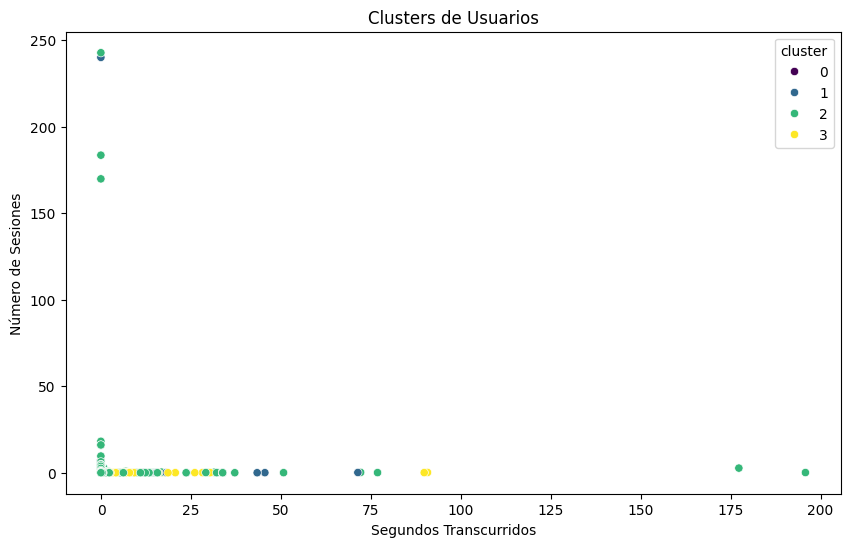

<Figure size 1500x1000 with 0 Axes>

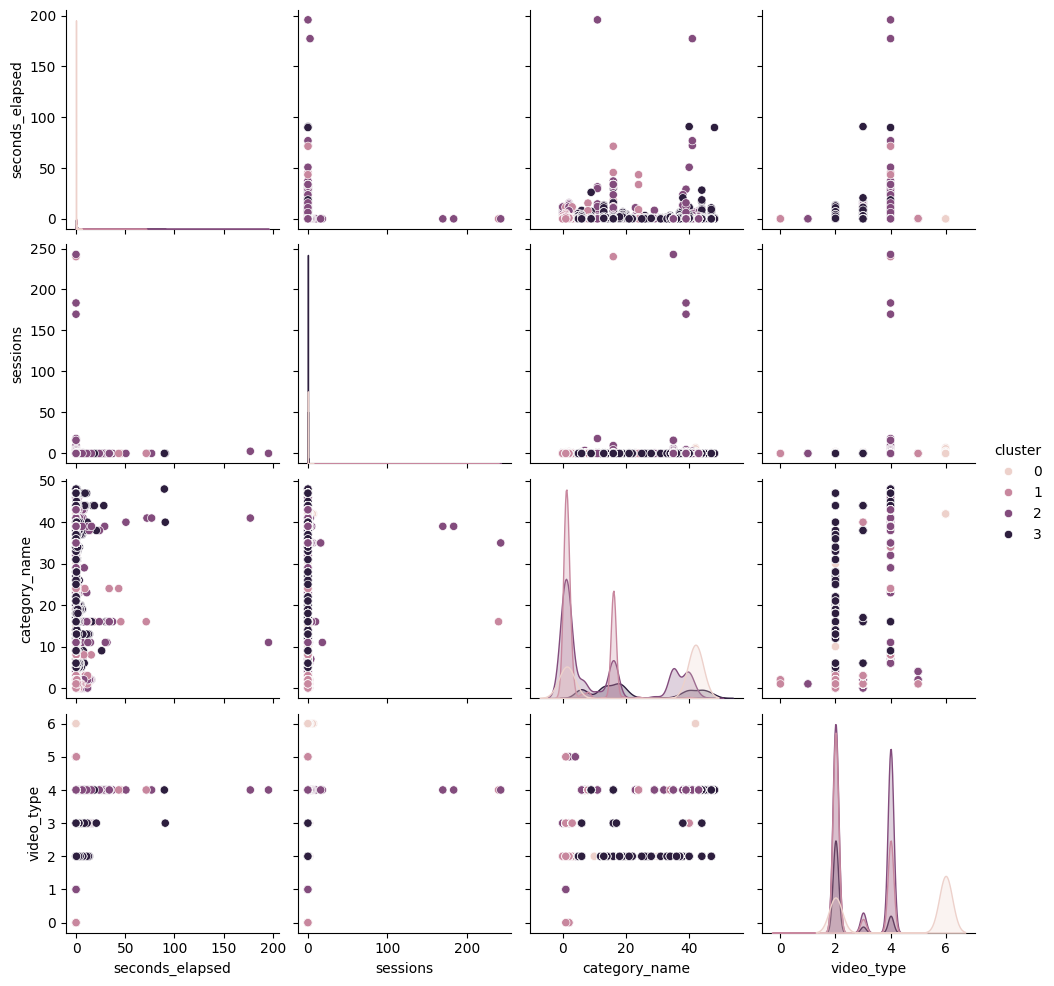

In [10]:
# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='seconds_elapsed', y='sessions', hue='cluster', palette='viridis')
plt.title('Clusters de Usuarios')
plt.xlabel('Segundos Transcurridos')
plt.ylabel('Número de Sesiones')
plt.show()
# Visualización de las características principales por cluster
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='cluster', vars=['seconds_elapsed', 'sessions', 'category_name', 'video_type'])
plt.show()


paso 8: interpretacion de clusters:


         client_id  brand_id  country_code  partner_id  platform_id  \
cluster                                                               
0              0.0  1.954605    109.843488   50.686975     1.320845   
1              0.0  1.998967     95.401462   46.217162     1.069932   
2              0.0  1.764590    106.282952   56.130338     1.131405   
3              0.0  1.996013    112.517399   45.787697     1.688950   

            media_id  category_name  video_type  seconds_elapsed  sessions  \
cluster                                                                      
0         315.270463      26.344578    4.464142        -0.085860 -0.004419   
1        3985.892734       5.851944    2.648742        -0.030790  0.001193   
2        2497.916455      12.624513    2.939894        -0.000224  0.005801   
3        5584.190244      23.345692    2.345588         0.248858 -0.016577   

         cluster  
cluster           
0            0.0  
1            1.0  
2            2.0  
3        

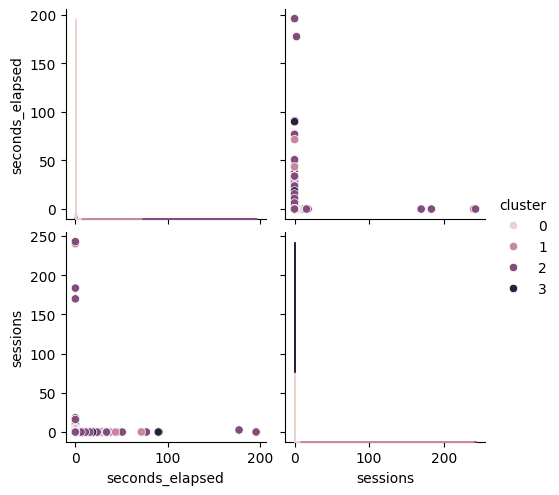

In [12]:
# Describir las estadísticas de los clusters
#cluster_summary = df.groupby('cluster').mean()
#print(cluster_summary)

# Visualizar los clusters
import seaborn as sns

#sns.pairplot(df, hue='cluster', vars=['seconds_elapsed', 'sessions'])
#plt.show()
# Excluir columnas no numéricas para el cálculo de la media
numerical_cols = df.select_dtypes(include=['number']).columns
cluster_summary = df[numerical_cols].groupby(df['cluster']).mean()
print(cluster_summary)

# Verificar si las columnas para la visualización son numéricas
print(df[['seconds_elapsed', 'sessions']].dtypes)

# Si alguna de las columnas no es numérica, onvertirla o excluirla
# Por ejemplo, si 'seconds_elapsed' y 'sessions' son cadenas de texto
df['seconds_elapsed'] = pd.to_numeric(df['seconds_elapsed'], errors='coerce')
df['sessions'] = pd.to_numeric(df['sessions'], errors='coerce')

# Visualizar los clusters
sns.pairplot(df.dropna(), hue='cluster', vars=['seconds_elapsed', 'sessions'])
plt.show()


Explicación del código
Importar bibliotecas: Importamos las bibliotecas necesarias para el análisis de datos y la aplicación del algoritmo de clustering.
Cargar el dataset: Cargamos el dataset en un DataFrame de pandas.
Exploración y limpieza de datos: Realizamos una exploración inicial y limpiamos los datos, incluyendo la conversión de variables categóricas a numéricas.
Preparación de los datos: Seleccionamos las características relevantes y escalamos los datos para el clustering.
Método del codo: Determinamos el número óptimo de clusters utilizando el método del codo.
Entrenar el modelo K-means: Entrenamos el modelo K-means con el número óptimo de clusters y asignamos los clusters a los datos.
Visualización de los resultados: Visualizamos los clusters y analizamos las características principales por cluster.
Interpretación: Interpretamos los resultados y resumimos las características de cada cluster.
Este código te proporciona una base sólida para segmentar a los clientes y analizar sus patrones de comportamiento utilizando K-means clustering. Puedes ajustar y expandir este análisis según sea necesario para tu proyecto específico.
